# Handout 2
EE-556: Mathematics of Data: From Theory to Computation - Fall 2024

In this handout, we will go through pen and paper exercises to get familiar with fundamental concepts that will be used throughout the course. We will take a look at convergence rates and smooth functions.

<span style="font-variant:small-caps;">Instructor: Prof. Volkan Cevher</span>

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
%%javascript
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

In [3]:
!uv add tqdm schedulefree

Resolved 70 packages in 3ms                                          
Audited 52 packages in 0.33ms


In [4]:
import numpy as np
from tqdm.notebook import tqdm
import torch as pt
from torch import nn
from torch.optim import SGD, Adam
from Sophia import SophiaG
from schedulefree import SGDScheduleFree
from matplotlib import pyplot as plt

n = 10000
p = 3
sigma = 0.1

def get_least_sq():
    return nn.Linear(p, 1, bias=False)
def get_small_nn(hidden_dim=100):
    return nn.Sequential(nn.Linear(p, hidden_dim), nn.ReLU(), nn.Linear(hidden_dim, 2))

## Interpreting convergence rates 

Throughout the course, we will often compare the performance of different methods by looking at convergence plots of different methods. It means that it is very important to be familiar with reading and drawing convergence rates. In the course, you will be mostly confronted with sublinear, linear and quadratic rates of convergence. Assume that you are given a sequence of iterates $(\textbf{x}_k) \in \mathbb{R}^p$, converging towards a vector $\textbf{x}^*$.

- Then, the sequence $(\textbf{x}_k)$ is said to converge **sublinearly** to $\textbf{x}^*$ if $$\lim_{k\to\infty} \frac{\|\textbf{x}_{k+1}- \textbf{x}^*\|}{\|\textbf{x}_k- \textbf{x}^*\|} = 1$$ 

- The sequence $(\textbf{x}_k)$ is said to converge **linearly** to $\textbf{x}^*$ if, for some $c \in (0,1)$, $$\lim_{k\to\infty} \frac{\|\textbf{x}_{k+1}- \textbf{x}^*\|}{\|\textbf{x}_k- \textbf{x}^*\|} = c$$ 

- The sequence $(\textbf{x}_k)$ is said to converge **superlinearly** to $\textbf{x}^*$ if, $$\lim_{k\to\infty} \frac{\|\textbf{x}_{k+1}- \textbf{x}^*\|}{\|\textbf{x}_k- \textbf{x}^*\|} = 0$$ 

    - The definition above can be refined by defining the *order of convergence*. The sequence $(\textbf{x}_k)$ is said to converge **with order $q > 1$** to $\textbf{x}^*$ if $$\lim_{k\to\infty} \frac{\|\textbf{x}_{k+1}- \textbf{x}^*\|}{\|\textbf{x}_k- \textbf{x}^*\|^q} < c$$ for some $c > 0$, not necessarily smaller than $1$. In particular, with $q=2$, we have **quadratic** convergence.

### Problem 1: Convergence rate of different sequences.

For each of the following sequences, find the limit $x^*$ and the the convergence rate.

i) $x_k = \displaystyle \frac{1}{k+1}$ 

ii) $x_k =\displaystyle\frac{5k+\log(k)}{3k+6}$

iii) $x_k =\displaystyle \frac{3}{2}\exp(-k/4)$

iv) $x_k =\displaystyle \frac{1}{(3k)^2}$

v) $x_k =\displaystyle\frac{1}{3^{2^k}}$

**Solution:**

### Problem 2: Drawing convergence rates

Draw the asymptotic rate of convergence $\|\textbf{x}_k - \textbf{x}^*\|$ for the following sequences on either of the graphs that feature different scales (lin-lin, log-lin, log-log).

i) $\displaystyle \frac{1}{k+1}$ 

ii) $\displaystyle\frac{1}{k^3+4}$

iii) $\displaystyle \frac{3}{2}\exp(-k/4)$

iv) $\displaystyle \frac{1}{(3k)^2}$ 


**Note.** Each of the sequences can be naturally drawn on one of the scales. By natural, we mean that on some scale, the asymptotic behaviour of the sequence will be displayed as a line. For instance, a line in a log-log plot means that $\log(\|\textbf{x}_k - \textbf{x}^*\|)$ is a *linear* function of $\log(k)$.

**Solution:**

### Problem 3: Reading convergence plots
On plots 1 and 2 below, the convergence rates of 5 methods are displayed (method $1$ is displayed on both plots). 

1. Characterize the rate of convergence (sublinear, linear, or quadratic) for each of the methods. Justify your answer.

2. Establish more precisely the order of convergence of methods $1$, $3$, $4$ and $5$ by reading the plots.

**Hint.** Find the slopes of the different lines and map, and use the scale of the plot to write the rate of convergence of the method.

3. Rank methods $1$ to $5$ from the slowest to the fastest **asymptotic** rate of convergence, using the fact that method $1$ is displayed on both plots.
	
|![](figs/plot1.png) | ![](figs/plot2.png)|
|-|-|

**Solution:**

#### With real results
Try running these two cells testing 4 popular optimization algorithms on a real least squares and binary classification problem, and from the displayed plots guage the convergence rates. Again, be careful on the scale of each axis!

<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
/var/folders/bc/0vdqzjk15fv9j3wdqq91kwkc0000gn/T/ipykernel_9682/8178854.py:42: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_ylabel("$f(x_k)-f(x^{\star})$")
/var/folders/bc/0vdqzjk15fv9j3wdqq91kwkc0000gn/T/ipykernel_9682/8178854.py:44: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_ylabel("$f(x_k)-f(x^{\star})$")


Optimizer:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

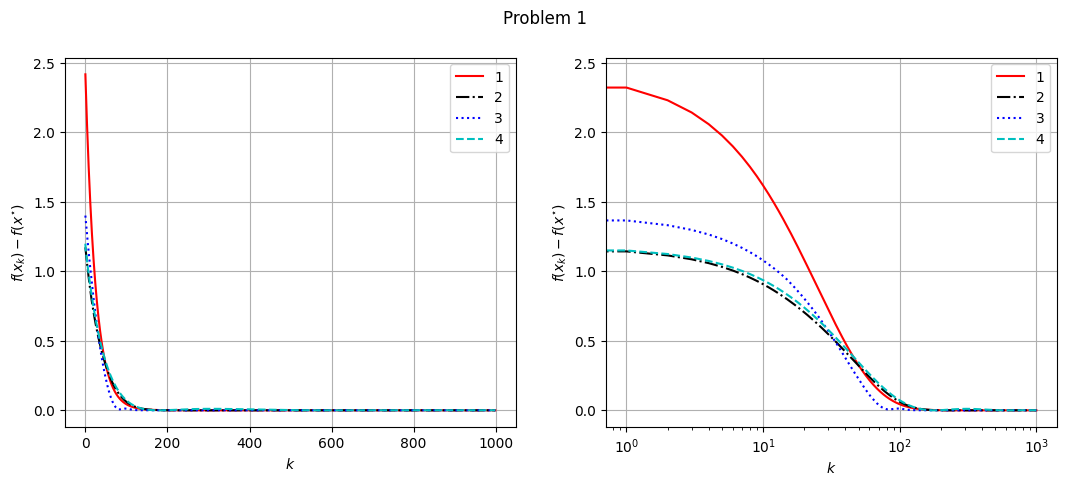

In [5]:
num_epochs = 1000
batch_size = n

A = pt.randn(n, p)
x = pt.randn(p)
w = sigma * pt.randn(n)
b = A @ x + w

# Optimal objective known for least squares
f_star = pt.dot(w, w).item() / n

criterion = nn.MSELoss()
models = [get_least_sq() for _ in range(4)]
optims = [SGD(models[0].parameters(), lr=1e-2), 
          Adam(models[1].parameters(), lr=1e-2), 
          SophiaG(models[2].parameters(), lr=1e-2, rho=1e-4, weight_decay=0), 
          SGDScheduleFree(models[3].parameters(), lr=1e-2)]
optims[3].train()
losses = []

for model, optim in tqdm(zip(models, optims), "Optimizer", 4):
    losses_optim = []
    for epoch in tqdm(range(num_epochs), "Epoch", leave=False):
        for i in range(0, n, batch_size):
            A_batch, b_batch = A[i:i+batch_size], b[i:i+batch_size]
            optim.zero_grad()
            loss = criterion(model(A_batch).squeeze(1), b_batch)
            losses_optim.append(loss.item())
            loss.backward()
            optim.step()
    losses.append(np.array(losses_optim))


f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(2 * 6.4, 4.8)
func_ = ax1.plot
func2_ = ax2.semilogx
for i, (losses_optim, style) in enumerate(zip(losses, ["r-", "k-.", "b:", "c--"])):
    func_(np.arange(len(losses_optim)), losses_optim - f_star, style, label=f"{i+1}")
    func2_(np.arange(len(losses_optim)), losses_optim - f_star, style, label=f"{i+1}")
ax1.set_xlabel("$k$")
ax1.set_ylabel("$f(x_k)-f(x^{\star})$")
ax2.set_xlabel("$k$")
ax2.set_ylabel("$f(x_k)-f(x^{\star})$")
ax1.grid('both')
ax2.grid('both')
f.suptitle("Problem 1")
ax1.legend()
ax2.legend()
plt.show()

In [12]:
for loss in losses:
    print(loss[-1] - f_star)

0.015929829329252243
0.003828875720500946
0.00881725363433361
0.01738365739583969


<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
/var/folders/bc/0vdqzjk15fv9j3wdqq91kwkc0000gn/T/ipykernel_9682/4178528550.py:42: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_ylabel("$f(x_k)-f(x^{\star})$")
/var/folders/bc/0vdqzjk15fv9j3wdqq91kwkc0000gn/T/ipykernel_9682/4178528550.py:44: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_ylabel("$f(x_k)-f(x^{\star})$")


Optimizer:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

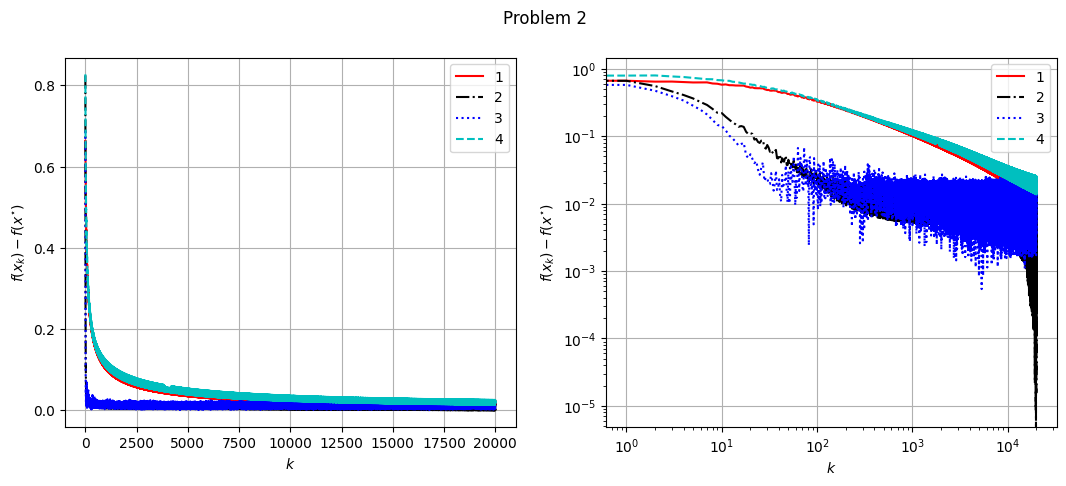

In [10]:
num_epochs = 2000
batch_size = 1024

A = pt.randn(n, p)
x = pt.randn(p)
w = sigma * pt.randn(n)
b = (A @ (x ** 2) + w < 1).long()


criterion = nn.CrossEntropyLoss()
models = [get_small_nn() for _ in range(4)]
optims = [SGD(models[0].parameters(), lr=1e-2), 
          Adam(models[1].parameters(), lr=1e-2), 
          SophiaG(models[2].parameters(), lr=1e-2, rho=1e-4, weight_decay=0), 
          SGDScheduleFree(models[3].parameters(), lr=1e-2)]
optims[3].train()
losses = []

for model, optim in tqdm(zip(models, optims), "Optimizer", 4):
    losses_optim = []
    for epoch in tqdm(range(num_epochs), "Epoch", leave=False):
        for i in range(0, n, batch_size):
            A_batch, b_batch = A[i:i+batch_size], b[i:i+batch_size]
            optim.zero_grad()
            loss = criterion(model(A_batch), b_batch)
            losses_optim.append(loss.item())
            loss.backward()
            optim.step()
    losses.append(np.array(losses_optim))

# Here we can only estimate the optimum
f_star = min(map(min, losses))

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(2 * 6.4, 4.8)
func_ = ax1.plot
func2_ = ax2.loglog
for i, (losses_optim, style) in enumerate(zip(losses, ["r-", "k-.", "b:", "c--"])):
    func_(np.arange(len(losses_optim)), losses_optim - f_star, style, label=f"{i+1}")
    func2_(np.arange(len(losses_optim)), losses_optim - f_star, style, label=f"{i+1}")
ax1.set_xlabel("$k$")
ax1.set_ylabel("$f(x_k)-f(x^{\star})$")
ax2.set_xlabel("$k$")
ax2.set_ylabel("$f(x_k)-f(x^{\star})$")
ax1.grid('both')
ax2.grid('both')
f.suptitle("Problem 2")
ax1.legend()
ax2.legend()
plt.show()

**Solution:**

### Problem 4: Convergence in accuracy against convergence in iterations

Up to now, we have considered convergence in **iteration**, as a function of $k$. However, it is common to view the convergence as a function of the time require to reach a given accuracy $\epsilon$. If we know that the $\|\textbf{x}_{k}- \textbf{x}^*\|\leq \frac{1}{k+1}$, the convergence in $\epsilon$ tries to characterize the order of convergence as a function of the desired accuracy instead of the number of iterations. In practice, this amounts  to find $K(\epsilon)$ such that $ \forall k\in \mathbb{N}$, $k \geq K(\epsilon) \Rightarrow \|\textbf{x}_{k+1}- \textbf{x}^*\| \leq \epsilon$.

Given the convergence rate $\|\textbf{x}_{k}- \textbf{x}^*\|$ of a sequence, express the number of iterations required to reach a accuracy $\epsilon$ for 

i) $\displaystyle \frac{1}{k+1}$

ii) $\displaystyle\frac{1}{k^3+4}$

iii) $\displaystyle \frac{3}{2}\exp(-k/4)$ 

iv) $\displaystyle \frac{1}{(3k)^2}$ 

v) $\displaystyle\frac{1}{3^{-2^k}}$

vi) $\displaystyle\frac{4}{\sqrt{k+3}}$

**Solution:**

## Smooth functions
Throughout the course, we will frequently encounter $L$-smooth functions.
**Definition.** A function $f:\mathcal{Q}\to\mathbb{R}$ is said to be $L$-smooth with respect to a pair of dual norms ($\|\cdot\|$, $\|\cdot\|_{ * }$) if there exists some $L>0$ such that

\begin{equation}
\|\nabla f(\textbf{x})-\nabla f(\textbf{y}) \|_* \leq L \|\textbf{x} -\textbf{y}\| \text{     } \forall \textbf{x}, \textbf{y} \in \mathcal{Q}.\tag{1}
\end{equation}

The Lipschitz constant of the the gradient $L$, also called the smoothness constant, can be computed in several ways, and we will explore different ways to obtain it in the following exercises.

### Problem 5: Lipschitz gradient in the one-dimensional case
In a single dimensional case, we have a function $f:\mathcal{Q}\subseteq \mathbb{R} \to \mathbb{R}$. The equation (1) can be restated as
$$|f'(x)-f'(y)| \leq L|x-y| \text{     } \forall \textbf{x}, \textbf{y} \in \mathcal{Q}.$$
Prove that the smoothness constant $L$ can be computed as the maximum of the absolute value of the second derivative, i.e. $L=\max_{z\in\mathcal{Q}} |f''(z)|$.

<span style="font-variant:small-caps;">Hint.</span> Use the mean value theorem.

<span style="font-variant:small-caps;">Remark.</span> This statement can be extended to higher dimensional cases, but one needs to be careful to appropriately define the norms that will be used.

**Solution:**

### Problem 6: Lipschitz gradient in the quadratic case
We now move to a multidimensional case, where we have $f:\mathbb{R}^p \to \mathbb{R}$ defined as $f(\textbf{x})=\frac{1}{2} \textbf{x}^\top A\textbf{x}$, where $A$ is a positive semi-definite matrix. We will explore a different way to compute the Lipschitz constant of the gradient in this setting.

Given a pair of dual norms ($\|\cdot\|_p,\|\cdot\|_q$) with $\frac{1}{p} + \frac{1}{q}=1$,  prove that when $$\|\nabla f(\textbf{x})-\nabla f(\textbf{y}) \|_q \leq L \|\textbf{x} -\textbf{y}\|_p \text{     } \forall \textbf{x}, \textbf{y} \in \mathcal{Q},$$ then $L=\|A\|_{p\to q}$.

<span style="font-variant:small-caps;">Hint.</span> Recall the definition of the operator norm from the lecture. $$\|A\|_{p\to q}:= \sup_{\textbf{x}:\|\textbf{x}\|_p \leq 1} \|A\textbf{x}\|_q$$

**Solution:**

### Problem 7: Operator norms in action

1. Given  $A\in\mathbb{R}^{m\times n}$ and $a_i^\top$ the $i$-th row of $A$, prove that the operator norm $\|\textbf{A}\|_{1\to \infty} = \max_{i\in\{1,\dots, m\}}\|a_i \|_\infty$.

2. Consider the matrix $$A = \begin{bmatrix} 2 & \frac{1}{\sqrt{2}} & -1 \\ \frac{1}{\sqrt{2}} & 3 & -\frac{1}{\sqrt{2}} \\ -1& -\frac{1}{\sqrt{2}} &2\end{bmatrix}.$$ Compute the Lipschitz constant of the gradient of $f(\textbf{x}) = \textbf{x}^\top A \textbf{x}$ in the following settings.

|$\|\nabla f(\textbf{x})-\nabla f(\textbf{y}) \|_\infty \leq L \|\textbf{x} -\textbf{y}\|_1$ | $\|\nabla f(\textbf{x})-\nabla f(\textbf{y}) \|_2 \leq L \|\textbf{x} -\textbf{y}\|_2$|
|-|-|

Are the values of $L$ equal? How do you interpret the result?


**Solution:**

#### Try verifying the result with code!

In [7]:
A = np.array([[2, 1/np.sqrt(2), -1], [1/np.sqrt(2), 3, -1/np.sqrt(2)], [-1, -1/np.sqrt(2), 2]])

# Compute the operator norm of A: ||A||_1->inf
# Recall that this is the maximum element in A
op_norm_1_inf = np.max(A)

# Compute the operator norm of A: ||A||_2->2
# Recall that this is the maximum singular value of A
op_norm_2_2 = np.max(np.linalg.svd(A, compute_uv=False))

op_norm_1_inf.round(4), op_norm_2_2.round(4)

(np.float64(3.0), np.float64(4.0))

### Problem 8: The importance of choosing the smoothness norm

1. During the lectures we saw that the L-smoothness of a function $f$ gives rise to local quadratic upper-bounds. The iterative minimization of these upper bounds recovers the well-known Gradient Descent (GD) method. As a warm-up, let us  remind ourselves of the computation.

Let $f: \mathbb{R}^d \to \mathbb{R}$ be convex and $L_2$-smooth and recall from the lecture that this implies
\begin{equation}
\tag{2}
f(y) \leq f(x) + \langle\nabla f(x), y - x \rangle + \frac{L_2}{2} \|x - y\|_2^2, \quad \forall x, y \in  \mathbb{R}^d.
\end{equation}
Show that the minimizer in $y$ of the right-hand side of (2) is 

\begin{equation}
\tag{3}
y^* = x - \frac{1}{L_2} \nabla f(x). 
\end{equation}

Observe that setting $x = x_k$ and letting $x_{k+1} := y^*$ in (3) results precisely in the update rule of GD.


**Solution:**

2. In point 1. we arrive at the GD update rule by considering the smoothness of $f$ with respect to the Euclidean norm. However, smoothness may be considered with respect to arbitrary norms $\|\cdot \|_p$, and its general expression is given by 

\begin{equation}
    \|\nabla f(x) -\nabla f(y)\|_q \leq L_p \|x - y\|_p,
    \tag{4}
\end{equation}

where $\|z\|_q := \max_{\|t\|_p \leq 1} \langle z, t\rangle $ is the dual norm of $\|\cdot\|_p$. As in the case of smoothness with respect to $\|\cdot\|_2$, smoothness with respect to $\|\cdot \|_p$ induces a local quadratic upper bound as follows:

\begin{equation}
     f(y) \leq f(x) + \langle\nabla f(x), y - x \rangle + \frac{L_p}{2} \|x - y\|_p^2, \quad \forall x, y \in  \mathbb{R}^d.
     \tag{5}
\end{equation}

By iteratively minimizing the right-hand side of (5) and depending on the chosen $p$, one arrives at various non-Euclidean gradient methods. The choice of norm is important as it can result in asymptotically faster gradient methods than the traditional GD. An example can be found in the work of [3], who leveraged smoothness with respect to $\|\cdot\|_{\infty}$ to obtain superior convergence for the maximum s-t flow and maximum concurrent multicommodity flow problems.

In the following, we will guide you in discovering the update rule that emerges from considering smoothness in the $\ell_{\infty}$-norm. Let $f:\mathbb{R}^d \to \mathbb{R}$ be convex with $L_{\infty}$-Lipschitz gradient $\|\nabla f(x) -\nabla f(y)\|_1 \leq L_{\infty} \|x - y\|_{\infty}$.

  (a) Define
    
\begin{equation} 
        [x]^{\#} := \underset{{s \in \mathbb{R}^d}}{\operatorname{arg\,max}} \left\{ \langle x, s\rangle - \frac{1}{2} \|s\|^2_{\infty} \right\}.
		\tag{6}
\end{equation}
    
Show that $\; \|x\|_1 \,\mathrm{sgn}(x) \in [x]^{\#} \; $, i.e. that it is a maximizer of the expression in (6).
    
***Hint:*** You can use H&ouml;lder's inequality below to find an upper bound, then show that it is correspondingly attained.

\begin{equation*}
        |\langle x, y\rangle| \leq \|x\|_p \|y\|_q \qquad \forall p, q \in [1, \infty] \text{ s.t. } \frac{1}{p} +  \frac{1}{q} = 1 \text{ (with the convention that } \frac{1}{\infty} = 0 ).
    \end{equation*}

**Solution:**

(b) Using inequality (5) adapted to the $\|\cdot\|_{\infty}$ norm, show that the minimizer in $y$ of its right-hand side is given by 
    \begin{equation*}
        y^* = x - \frac{1}{L_{\infty}} \|\nabla f(x)\|_1\mathrm{sgn}\left(\nabla f(x)\right).
    \end{equation*}
    
Similar to point 1., observe how letting $x = x_k$ and $x_{k+1} := y^*$ gives us an update rule. This type of update pertains to the so-called SignGD method.

***Hint:*** Write down the relevant $\underset{}{\operatorname{arg\,max}}$ expression and then try to transform it equivalently such that the $\underset{}{\operatorname{arg\,max}}$ formulation from (6) appears. 

***Remark:*** For those interested in doing further reading on the topic, [2] and [1] are good places to start. 

**Solution:**

## References

[1] J. Bernstein, Y.-X. Wang, K. Azizzadenesheli, and A. Anandkumar. signsgd: Compressed optimisation for non-convex problems.
arXiv preprint arXiv:1802.04434, 2018.

[2] D. E. Carlson, E. Collins, Y.-P. Hsieh, L. Carin, and V. Cevher. Preconditioned spectral descent for deep learning. In Advances in
Neural Information Processing Systems, pages 2971–2979, 2015.

[3] J. A. Kelner, Y. T. Lee, L. Orecchia, and A. Sidford. An almost-linear-time algorithm for approximate max flow in undirected graphs,
and its multicommodity generalizations. In Proceedings of the twenty-fifth annual ACM-SIAM symposium on Discrete algorithms, pages
217–226. SIAM, 2014.